<table>
    <tr>
        <td>
            <div align ="center">
                <font color="#21618C" size=8px>
                    <b> Machine Learning project <br> on Wholesale customers data
                    </b>
                </font>
            </div>
        </td>
    <tr>
<table>

## problem statement:
    Our project goal is to use various clustering techniques to segment customers. Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Thus, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data

### Data description:
1) FRESH: annual spending (m.u.) on fresh products (Continuous)        
2) MILK: annual spending (m.u.) on milk products (Continuous)     
3) GROCERY: annual spending (m.u.)on grocery products (Continuous)       
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)         
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)                          
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)                   
7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)               
8) REGION: customers Region - Lisnon, Oporto or Other (Nominal)  
Region Frequency:        
Lisbon 77 Oporto 47 Other Region 316 Total 440             
                         
Channel Frequency:                          
Horeca 298 Retail 142 Total 440

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Reading the data

In [2]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### First 5 observations

Shape of the dataset

In [3]:
df.shape

(440, 8)

Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Describing the numerical features

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


obtaining the datatypes

In [6]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

# Checking for Missing Values 

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No missing values in the dataset

In [8]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [10]:
data = df.copy()
#converting channel and region to categorical variables
data['Channel'] = data['Channel'].map({1:'Horeca', 2:'Retail'})
data['Region'].replace([1,2,3],['Lisbon','Oporto','other'],inplace=True)

In [11]:
data.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776


# EDA

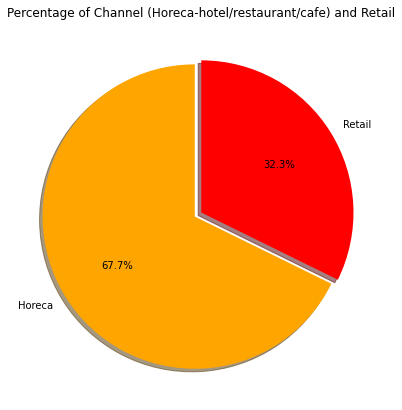

In [12]:
labels =data['Channel'].value_counts(sort = True).index
sizes = data['Channel'].value_counts(sort = True)
 
colors = ["orange","red"]
explode = (0.05,0) 
  
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
 
plt.title('Percentage of Channel (Horeca-hotel/restaurant/cafe) and Retail')
plt.show()

67.7% of the data is of channel Horeca whereas 32.2% of the data is of channel Retail

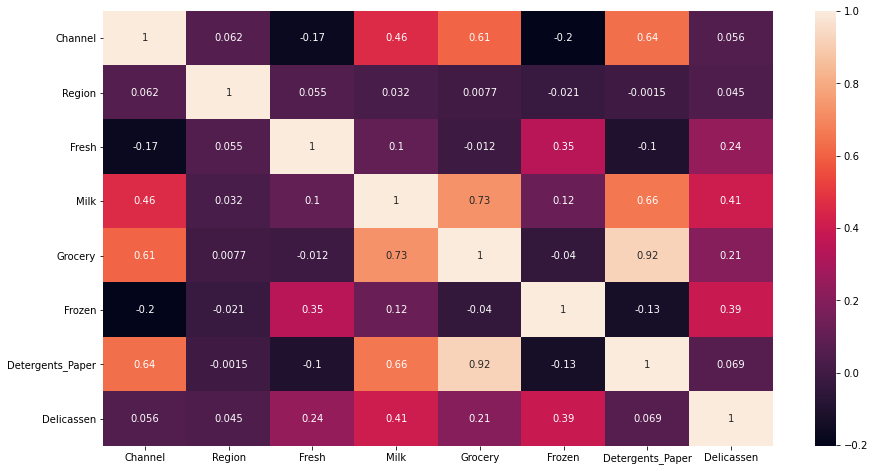

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64


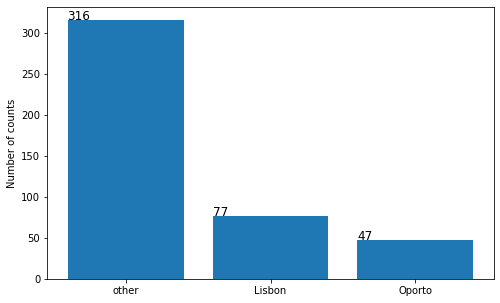

In [14]:
u1=data.Region.value_counts()
print(u1)
Region_name = data.Region.value_counts().index
Region_size = data.Region.value_counts().values

fig,ax=plt.subplots(figsize=(8,5))
ax.bar(Region_name, Region_size, data=data)
ax.set_ylabel('Number of counts')
for p in ax.patches:
    an=ax.annotate(str(p.get_height()), xy=(p.get_x(),p.get_height()))
    an.set_size(12)

Horeca    298
Retail    142
Name: Channel, dtype: int64


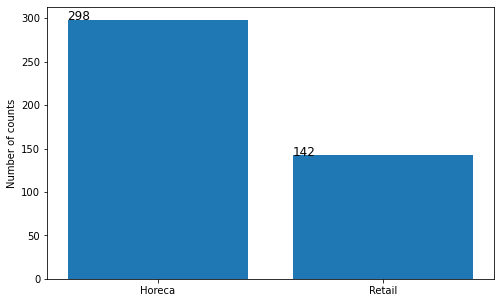

In [15]:
u2=data.Channel.value_counts()
print(u2)
Channel_name = data.Channel.value_counts().index
Channel_size = data.Channel.value_counts().values

fig,ax=plt.subplots(figsize=(8,5))
ax.bar(Channel_name, Channel_size, data=data)
ax.set_ylabel('Number of counts')
for p in ax.patches:
    an=ax.annotate(str(p.get_height()), xy=(p.get_x(),p.get_height()))
    an.set_size(12)

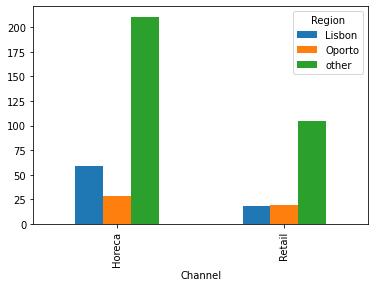

Region   Lisbon  Oporto  other
Channel                       
Horeca       59      28    211
Retail       18      19    105


In [16]:
def categorical_multi(i,j):
    pd.crosstab(data[i],data[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(data[i],data[j]))

categorical_multi(i='Channel',j='Region') 

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


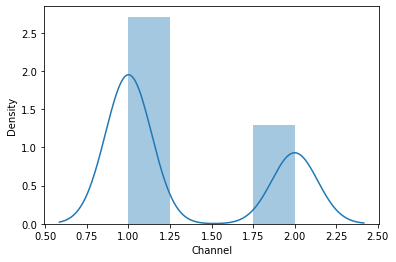

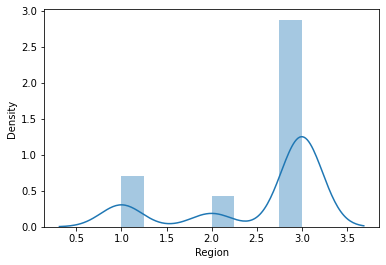

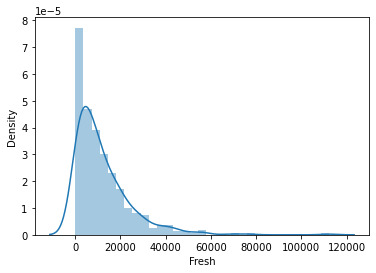

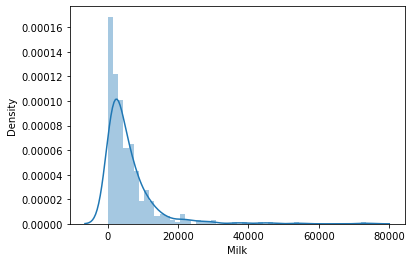

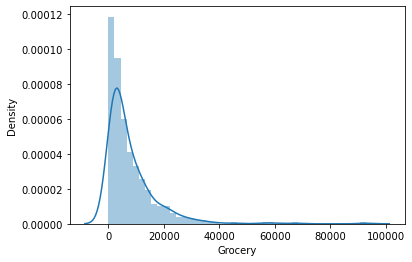

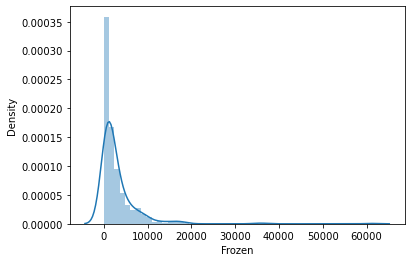

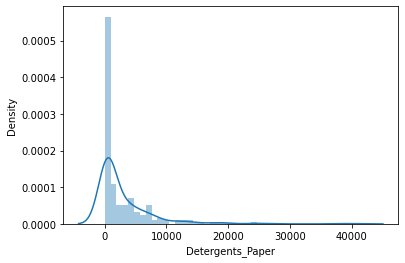

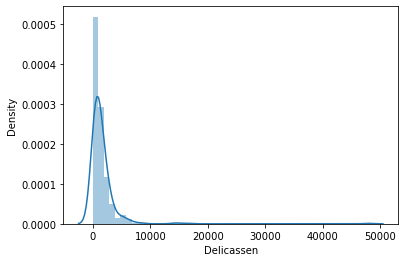

In [17]:
print(df.skew())

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<Figure size 1440x1440 with 0 Axes>

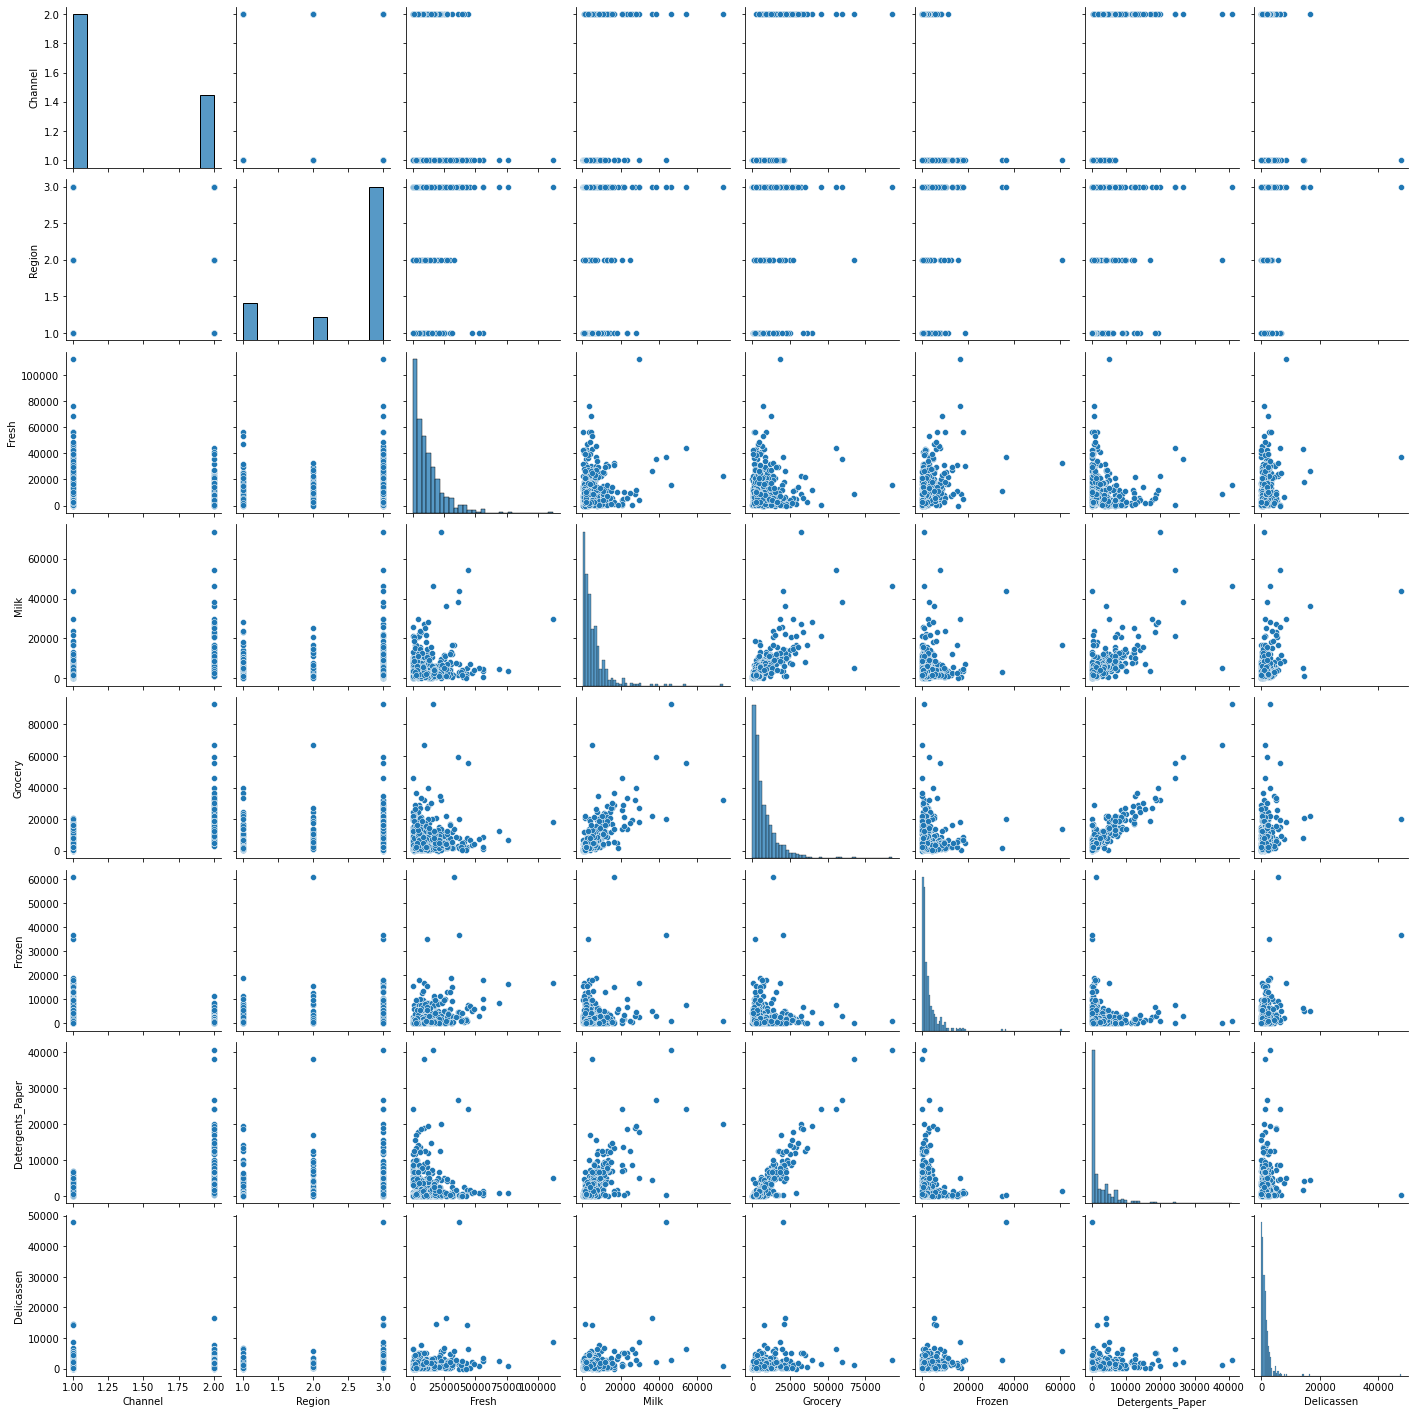

In [18]:
fig = plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

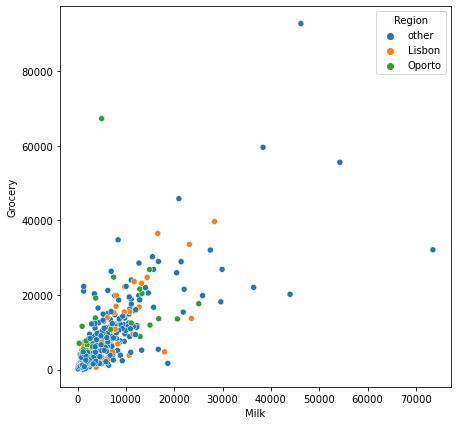

In [19]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data, x="Milk", y="Grocery", hue='Region')
plt.show()

# Data Preprocessing

In [13]:
#Data Transformation
log_data = np.log(data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].copy())
log_data.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504


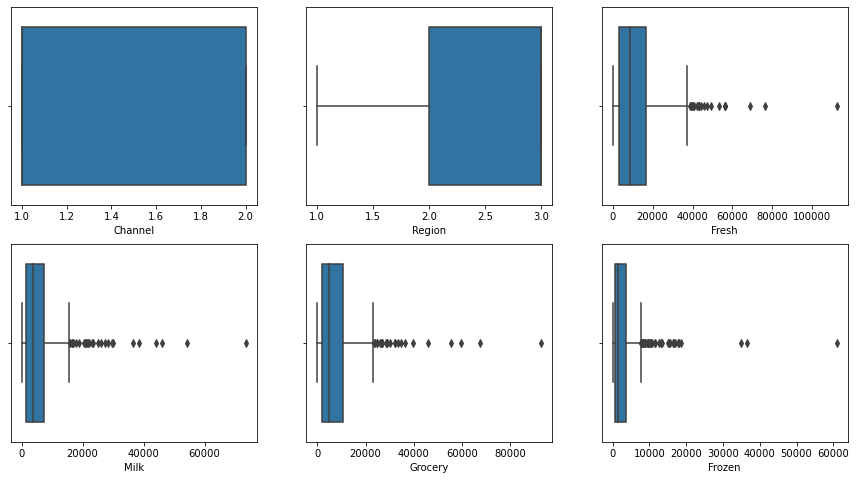

In [20]:
#checking for outliers
df_num = df.select_dtypes(include=np.number)#drop(['Channel', 'Region'], axis = 1)
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)
plt.show()

outliers present in all the numeric columns

In [21]:
#seperating categorical variables
df_cat=data.select_dtypes(include='object')

#seperating numeric variables
df_num=data.select_dtypes(include=np.number)

In [32]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'cluster'],
      dtype='object')

In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
features = df[[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]
ss=StandardScaler()
xs=ss.fit_transform(features)
xs=pd.DataFrame(xs,columns=features.columns)
xs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Clustering

### Hierarchical clustering

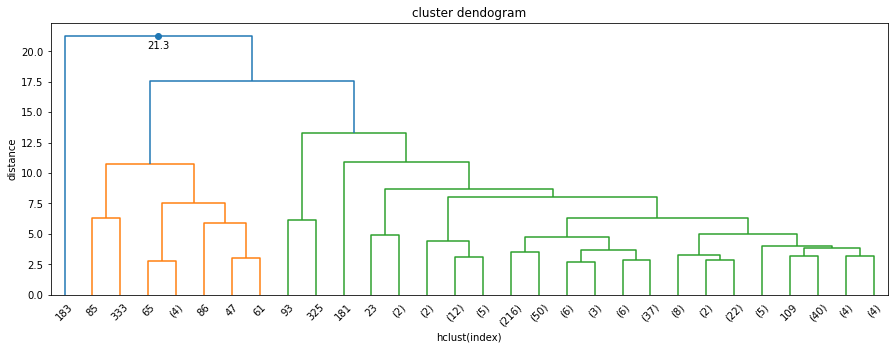

In [23]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

plt.figure(figsize=(15,5))

clus=linkage(xs,metric='euclidean',method='complete')
#print(clus[0:5])
dendro=dendrogram(clus,truncate_mode='lastp')

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2 
    y = d[1]
    if y > 20:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')



plt.xlabel('hclust(index)')
plt.ylabel('distance')
plt.title('cluster dendogram')
plt.show()

The different colors indicate  different clusters,there are 3 clusters

In [24]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import cophenet
eucli_dist = euclidean_distances(xs)
dist_array = eucli_dist[np.triu_indices(440, k = 1)]
coeff, cophenet_dist = cophenet(clus, dist_array)
print(coeff)

0.8382968943303105


The value of cophenetic correlation coefficient is 0.8382. The value is not close to 1 indicates a best linkage quality. Therefore the linkage is good.

In [25]:
clustercut=pd.Series(cut_tree(clus,n_clusters=3).reshape(-1,))
clustercut.value_counts()

0    429
1     10
2      1
dtype: int64

In [116]:
df['cluster']=clustercut

In [117]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN,Cluster_km
0,1,3,12669,9656,7561,214,2674,1338,0,0,0
1,1,3,7057,9810,9568,1762,3293,1776,0,0,3
2,1,3,6353,8808,7684,2405,3516,7844,0,-1,3
3,0,3,13265,1196,4221,6404,507,1788,0,0,0
4,1,3,22615,5410,7198,3915,1777,5185,0,-1,2


In [118]:
df.groupby('cluster').agg('mean')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_DBSCAN,Cluster_km
cluster,,,,,,,,,,
0,0.307692,2.543124,11849.965035,5033.384615,6976.74359,2994.335664,2374.979021,1383.617716,-0.195804,0.965035
1,1.000000,2.500000,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000,-1.000000,4.000000
2,0.000000,3.000000,36847.000000,43950.000000,20170.00000,36534.000000,239.000000,47943.000000,-1.000000,1.000000


#### Agglomerative Clustering

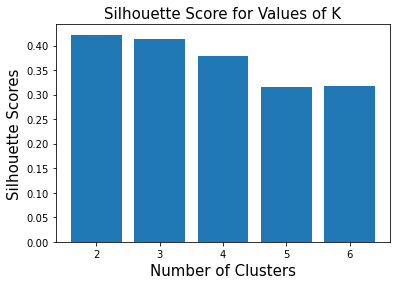

In [31]:
#silhouette score method to identify the optimal number of clusters
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
K = [2,3,4,5,6]
silhouette_scores = [] 
for i in K:
    model = AgglomerativeClustering(n_clusters = i) 
    silhouette_scores.append(silhouette_score(xs, model.fit_predict(xs))) 

plt.bar(K, silhouette_scores) 
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)
plt.show()

The above plot shows that the Silhouette score for K = 2 is the highest. This imlpies that K = 2 is the optimal value for number of clusters.

In [32]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters.fit(xs)

AgglomerativeClustering(linkage='complete')

In [33]:
df['cluster'].value_counts()

0    429
1     10
2      1
Name: cluster, dtype: int64

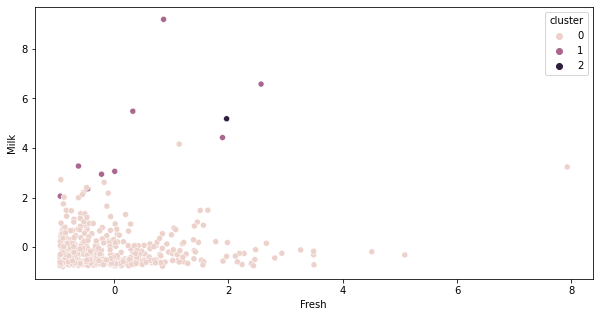

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Fresh',y='Milk',data=xs,hue=df['cluster'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

The largest cluster is cream

In [35]:
df[df.cluster==0].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.0
mean,1.307692,2.543124,11849.965035,5033.384615,6976.743590,2994.335664,2374.979021,1383.617716,0.0
std,0.462077,0.774072,12564.890779,4951.258636,6630.338717,4625.931689,3210.910000,1724.776039,0.0
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0
25%,1.000000,2.000000,3097.000000,1492.000000,2128.000000,737.000000,256.000000,405.000000,0.0
50%,1.000000,3.000000,8258.000000,3587.000000,4604.000000,1504.000000,788.000000,929.000000,0.0
75%,2.000000,3.000000,16823.000000,6958.000000,9819.000000,3527.000000,3674.000000,1776.000000,0.0
max,2.000000,3.000000,112151.000000,36423.000000,36486.000000,60869.000000,17120.000000,16523.000000,0.0


In [36]:
df[df.cluster==1].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,2.0,2.500000,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000,1.0
std,0.0,0.849837,14394.616621,19308.486409,20553.47215,2689.795994,8250.298699,1966.992504,0.0
min,2.0,1.000000,85.000000,4980.000000,26866.00000,36.000000,17740.000000,903.000000,1.0
25%,2.0,2.250000,6741.750000,24217.750000,32482.00000,996.750000,19032.000000,1360.750000,1.0
50%,2.0,3.000000,10658.500000,29109.000000,42761.00000,2924.000000,22120.500000,2443.500000,1.0
75%,2.0,3.000000,21223.000000,44240.000000,58591.25000,4365.500000,26083.500000,4576.750000,1.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.000000,1.0


### DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.8, min_samples = 10)
model.fit(xs)

DBSCAN(eps=0.8, min_samples=10)

In [38]:
(set(model.labels_))

{-1, 0}

The data labelled as -1 are the outliers identified by DBSCAN

In [39]:
df['Cluster_DBSCAN'] = model.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,0,0
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


In [41]:
df['Cluster_DBSCAN'].value_counts()

 0    345
-1     95
Name: Cluster_DBSCAN, dtype: int64

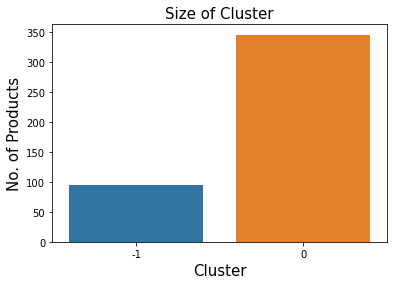

In [43]:
sns.countplot(data = df, x = 'Cluster_DBSCAN')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)
plt.show()

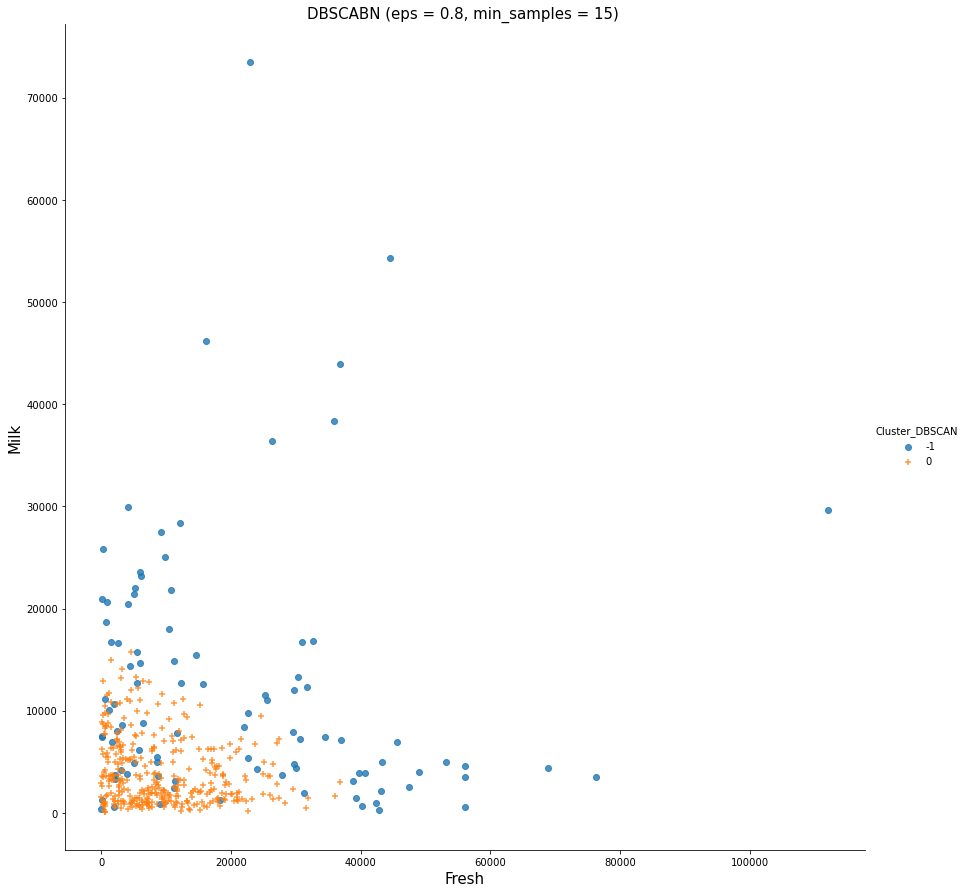

In [44]:
sns.lmplot(x = 'Fresh', y = 'Milk', data = df, hue = 'Cluster_DBSCAN', markers = ['o','+'], 
           fit_reg = False, size = 12)
plt.title('DBSCABN (eps = 0.8, min_samples = 15) ', fontsize = 15)
plt.xlabel('Fresh', fontsize = 15)
plt.ylabel('Milk', fontsize = 15)

plt.show()

The blue circles corresponds to outlliers.We can see some of the points are overlapped. This is because the dimension of the original data is greater than 2 and we have considered only 2 variables to plot the clusters.

### k-means Clustering

In [45]:
from sklearn.cluster import KMeans
wcss  = []          #Within Cluster Sum of Squares
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(xs)
    wcss.append(kmeans.inertia_)

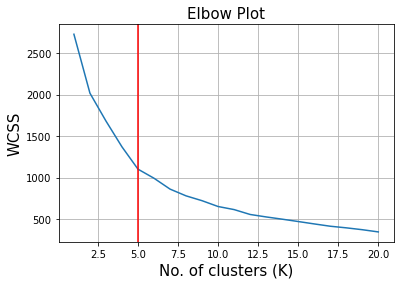

In [63]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 5, color = 'red')
plt.grid(True)
plt.show()

We can see that the for K = 5, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 5, the WCSS is decreasing slowly

##### Finding optimal value using silhouette score

In [64]:
from sklearn.metrics import silhouette_score,silhouette_samples
n_clusters = [2, 3, 4, 5, 6]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(xs)
    score = silhouette_score(xs, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.5813786552641048)
For 3 clusters the silhouette score is 0.5420091437306166)
For 4 clusters the silhouette score is 0.43015007444252146)
For 5 clusters the silhouette score is 0.37857712392806553)
For 6 clusters the silhouette score is 0.36854424825060517)


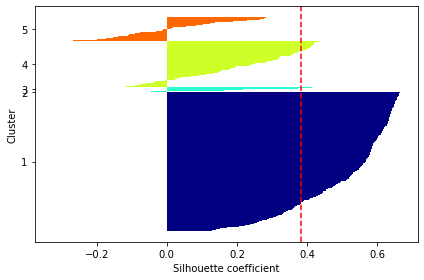

In [65]:
import plusmodules as pm
pm.svisualizer(xs,5)  #silhouette  plot for k=5

In [46]:
new_clusters = KMeans(n_clusters = 5, random_state = 10)
new_clusters.fit(xs)
df['Cluster_km'] = new_clusters.labels_

In [47]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN,Cluster_km
0,2,3,12669,9656,7561,214,2674,1338,0,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0,3
2,2,3,6353,8808,7684,2405,3516,7844,0,-1,3
3,1,3,13265,1196,4221,6404,507,1788,0,0,0
4,2,3,22615,5410,7198,3915,1777,5185,0,-1,2


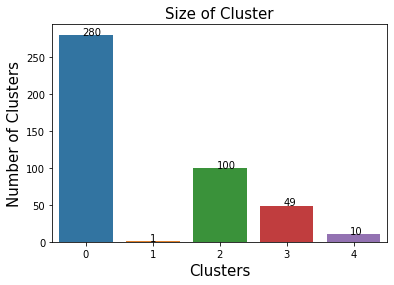

In [72]:
sns.countplot(data= xs, x = 'Cluster_km')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Clusters', fontsize = 15)
plt.text(x = -0.05, y =280, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =1, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =100, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =49, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =10, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])
plt.show()

cluster 0 is the largest with 280 observations

In [48]:
df.Cluster_km.value_counts()

0    270
3     96
2     63
4     10
1      1
Name: Cluster_km, dtype: int64

In [50]:
df[df.Cluster_km==0].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN,Cluster_km
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0,270.000000,270.0
mean,1.137037,2.518519,9092.155556,2967.759259,3807.411111,2271.759259,989.814815,978.962963,0.0,-0.037037,0.0
std,0.344525,0.788880,6686.340923,2474.264473,2811.842619,2350.107345,1201.565591,898.828444,0.0,0.189203,0.0
min,1.000000,1.000000,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000,0.0,-1.000000,0.0
25%,1.000000,2.000000,3248.000000,1143.250000,1768.000000,673.750000,199.250000,342.500000,0.0,0.000000,0.0
50%,1.000000,3.000000,7861.000000,2157.000000,2859.000000,1447.000000,422.000000,709.500000,0.0,0.000000,0.0
75%,1.000000,3.000000,13561.000000,3911.500000,5232.000000,2939.750000,1302.500000,1328.000000,0.0,0.000000,0.0
max,2.000000,3.000000,27329.000000,18664.000000,16483.000000,15601.000000,5316.000000,5137.000000,0.0,0.000000,0.0


In [51]:
df[df.Cluster_km==1].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN,Cluster_km
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,2.0,-1.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,2.0,-1.0,1.0
25%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,2.0,-1.0,1.0
50%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,2.0,-1.0,1.0
75%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,2.0,-1.0,1.0
max,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,2.0,-1.0,1.0


In [52]:
df[df.Cluster_km==2].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN,Cluster_km
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.0
mean,1.126984,2.682540,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254,0.0,-0.650794,2.0
std,0.335630,0.691548,17247.704151,4814.850077,4535.058497,9178.662583,1151.861306,2752.989314,0.0,0.480548,0.0
min,1.000000,1.000000,4983.000000,286.000000,471.000000,287.000000,20.000000,3.000000,0.0,-1.000000,2.0
25%,1.000000,3.000000,23123.500000,2068.500000,2307.500000,3003.500000,299.000000,939.000000,0.0,-1.000000,2.0
50%,1.000000,3.000000,29955.000000,3916.000000,5026.000000,6312.000000,523.000000,1819.000000,0.0,-1.000000,2.0
75%,1.000000,3.000000,39966.500000,5458.000000,7726.500000,10473.000000,1099.500000,2792.000000,0.0,0.000000,2.0
max,2.000000,3.000000,112151.000000,29627.000000,21042.000000,60869.000000,4948.000000,14472.000000,0.0,0.000000,2.0


In [53]:
df[df.Cluster_km==3].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN,Cluster_km
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,96.0
mean,1.906250,2.520833,5754.166667,10866.604167,16607.104167,1464.125000,7202.875000,1813.385417,0.0,-0.343750,3.0
std,0.293011,0.781081,5991.802716,5609.764252,6260.071462,1547.614506,3339.170891,2178.076067,0.0,0.477452,0.0
min,1.000000,1.000000,18.000000,1275.000000,4748.000000,25.000000,282.000000,3.000000,0.0,-1.000000,3.0
25%,2.000000,2.000000,1357.000000,7369.250000,11648.250000,427.250000,4950.250000,590.250000,0.0,-1.000000,3.0
50%,2.000000,3.000000,4054.500000,9769.500000,14923.500000,957.000000,6756.500000,1333.000000,0.0,0.000000,3.0
75%,2.000000,3.000000,8229.250000,12849.750000,20429.500000,1860.000000,8757.250000,2160.500000,0.0,0.000000,3.0
max,2.000000,3.000000,26373.000000,36423.000000,36486.000000,10155.000000,17120.000000,16523.000000,0.0,0.000000,3.0


In [54]:
df[df.Cluster_km==4].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Cluster_DBSCAN,Cluster_km
count,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0,10.0,10.0
mean,2.0,2.500000,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000,1.0,-1.0,4.0
std,0.0,0.849837,14394.616621,19308.486409,20553.47215,2689.795994,8250.298699,1966.992504,0.0,0.0,0.0
min,2.0,1.000000,85.000000,4980.000000,26866.00000,36.000000,17740.000000,903.000000,1.0,-1.0,4.0
25%,2.0,2.250000,6741.750000,24217.750000,32482.00000,996.750000,19032.000000,1360.750000,1.0,-1.0,4.0
50%,2.0,3.000000,10658.500000,29109.000000,42761.00000,2924.000000,22120.500000,2443.500000,1.0,-1.0,4.0
75%,2.0,3.000000,21223.000000,44240.000000,58591.25000,4365.500000,26083.500000,4576.750000,1.0,-1.0,4.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.000000,1.0,-1.0,4.0


## Principal Component Analysis - PCA

#### It is one of the dimensionality reduction techniques to obtain the dimensions accounting for maximum variance

In [55]:
df['Channel']=df['Channel']-1

In [56]:
df['Channel'].value_counts()

0    298
1    142
Name: Channel, dtype: int64

#### Separating the dependent variable and independent variables

In [3]:
y=df['Channel']
X=df.drop('Channel',axis=1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Train-Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))
print('\n')
print('Test-Accuracy Score: ', accuracy_score(y_test, y_test_pred))
print('Test-AUC: ', roc_auc_score(y_test, y_test_prob))

Train-Accuracy Score:  1.0
Train-AUC:  1.0


Test-Accuracy Score:  0.9015151515151515
Test-AUC:  0.9671052631578947


We can see clearly that model has overfitted.Lets tune the model with hyperparameters

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc=RandomForestClassifier(random_state=4)
param_dist={'n_estimators':sp_randint(50,250),
           'max_features':sp_randint(2,8),
           'max_depth':sp_randint(2,10),
           'criterion':['gini','entropy'],
           'min_samples_leaf':sp_randint(1,50)}
rsearch=RandomizedSearchCV(rfc,param_distributions=param_dist,n_iter=25,cv=3,scoring='roc_auc',random_state=4)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7C54AB48>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7C54A748>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7C54AD48>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7BE362C8>},
                   random_state=4, scoring='roc_auc')

In [6]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 6,
 'min_samples_leaf': 28,
 'n_estimators': 109}

In [7]:
best_params1={'criterion': 'gini',
 'max_depth': 2,
 'max_features': 6,
 'min_samples_leaf': 24,
 'n_estimators': 164}

In [8]:
rfc=RandomForestClassifier(random_state=4, **best_params1)
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Train-Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))
print('\n')
print('Test-Accuracy Score: ', accuracy_score(y_test, y_test_pred))
print('Test-AUC: ', roc_auc_score(y_test, y_test_prob))

Train-Accuracy Score:  0.9253246753246753
Train-AUC:  0.9729449472096531


Test-Accuracy Score:  0.8863636363636364
Test-AUC:  0.95996640537514


#### Even after tuning for the hyperparameters we were not able to reduce the effect of overfitting.


#### So lets look into obtaining the best suitable components using PCA

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [10]:
pca=PCA()
pca.fit(X_trains)

PCA()

In [11]:
pca.explained_variance_  ### Eigen values

array([2.66007146, 1.7349925 , 1.01422642, 0.74641055, 0.52777258,
       0.28606721, 0.0532606 ])

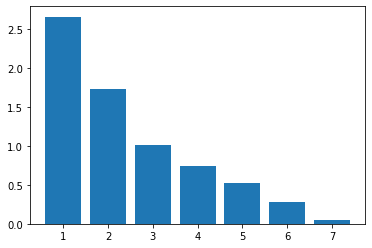

In [13]:
plt.bar(range(1,8),pca.explained_variance_)
plt.show()

In [14]:
pca.explained_variance_ratio_ ## The variation ratio of each component

array([0.37877641, 0.24705134, 0.14441907, 0.10628388, 0.07515129,
       0.04073406, 0.00758395])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.37877641, 0.62582775, 0.77024682, 0.8765307 , 0.95168199,
       0.99241605, 1.        ])

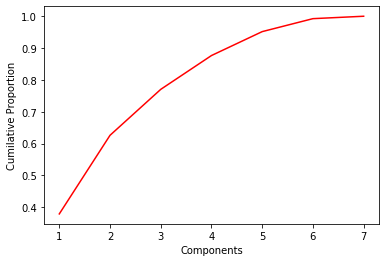

In [17]:
plt.plot(range(1,8),np.cumsum(pca.explained_variance_ratio_),c='r')
plt.xlabel('Components')
plt.ylabel('Cumilative Proportion')
plt.show()

#### NOTE:-

#### Here from the cumilative sum and the plot we will get to know that almost 5 components are accounting for 95% of variation in the data

#### So now lets use the PCA technique for 95% of variation and have a look at how our model performs

In [18]:
pca=PCA(0.95)
pca.fit(X_trains)

PCA(n_components=0.95)

In [19]:
pca.explained_variance_

array([2.66007146, 1.7349925 , 1.01422642, 0.74641055, 0.52777258])

In [20]:
components=pca.components_.T
components.shape

(7, 5)

In [22]:
pcs=['PC'+str(i) for i in range(1,6)]
pcs

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [23]:
pd.DataFrame(components,index=X.columns,columns=pcs)

,PC1,PC2,PC3,PC4,PC5
Region,0.044023,0.008797,-0.984285,0.000826,0.170588
Fresh,0.055930,0.510133,-0.018059,-0.843931,-0.143586
Milk,0.544778,0.065699,-0.003223,0.059817,-0.142191
Grocery,0.577176,-0.158485,0.042543,-0.098156,0.125048
Frozen,0.074993,0.604956,0.137618,0.242128,0.741643
Detergents_Paper,0.546515,-0.269123,0.057643,-0.106798,0.170011
Delicassen,0.246407,0.521396,-0.082306,0.452256,-0.579215


In [24]:
pca=PCA(0.95)
X_train_pc=pca.fit_transform(X_trains)
X_test_pc=pca.transform(X_tests)

In [25]:
X_train_pc.shape,X_test_pc.shape

((308, 5), (132, 5))

In [26]:
rfc=RandomForestClassifier(random_state=4)
rfc.fit(X_train_pc,y_train)

RandomForestClassifier(random_state=4)

In [27]:
rfc=RandomForestClassifier(random_state=4)
param_dist={'n_estimators':sp_randint(50,250),
           'max_features':sp_randint(2,5),
           'max_depth':sp_randint(2,10),
           'criterion':['gini','entropy'],
           'min_samples_leaf':sp_randint(1,50)}
rsearch=RandomizedSearchCV(rfc,param_distributions=param_dist,n_iter=25,cv=3,scoring='roc_auc',random_state=4)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7C566088>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7D090F08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7C588808>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011F7D090288>},
                   random_state=4, scoring='roc_auc')

In [28]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 32,
 'n_estimators': 235}

In [29]:
best_params2={'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 32,
 'n_estimators': 235}

In [30]:
rfc=RandomForestClassifier(random_state=4, **best_params2)
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Train-Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))
print('\n')
print('Test-Accuracy Score: ', accuracy_score(y_test, y_test_pred))
print('Test-AUC: ', roc_auc_score(y_test, y_test_prob))

Train-Accuracy Score:  0.9285714285714286
Train-AUC:  0.9728506787330317


Test-Accuracy Score:  0.8863636363636364
Test-AUC:  0.9658454647256439


#### Lets see the cross validation scores

In [31]:
from sklearn.model_selection import cross_val_score

rfc=RandomForestClassifier(random_state=4,**best_params1)
cvs1=cross_val_score(rfc,X,y,scoring='roc_auc',cv=3)
cvs1

array([0.97201178, 0.95829787, 0.95852138])

In [32]:
cvs1.mean()

0.9629436803018364

In [33]:
rfc=RandomForestClassifier(random_state=4,**best_params2)
cvs2=cross_val_score(rfc,X,y,scoring='roc_auc',cv=3)
cvs2

array([0.9760101 , 0.96021277, 0.95336342])

In [34]:
cvs2.mean()

0.9631954294720252

## Final Inferences after applying PCA

The base model we choose initially i.e Random Forest clearly showed signs of overfitting.So after tuning the model for hyperparameters the model's overfitting ratio came down an amount lesser than considerable.So as the next step lets look into PCA, one of the dimensionality reduction technique available.

After considering the dimensionality reduction technique(PCA) we could see that there were 5 components that were contributing to the maximum variance.But we couldnt see a major improvement in the models performance by taking up the dimensionality reduction technique

#                            Thank you!